<a href="https://colab.research.google.com/github/arindamdeyofficial/XRay_Pneumonia_Deep_Nural_Network_Analysis/blob/main/feature_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question No.2. Dataset: data1_0.5-1.csv  Download data1_0.5-1.csv 

In [ ]:
#libraries
import numpy as np 
import pandas as pd 
import random

# folder
import os

# Imports packages to view data
import cv2
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow
from prettytable import PrettyTable

# visu
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rc('image', cmap='gray')

# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2

#google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(tf.__version__)

2.7.0


In [ ]:
train_data_dir = "/content/drive/My Drive/Colab Notebooks/chest_xray/train"
val_data_dir = "/content/drive/My Drive/Colab Notebooks/chest_xray/val"
test_data_dir = "/content/drive/My Drive/Colab Notebooks/chest_xray/test"

In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/chest_xray"

test  train  val


**Exploratory Data Analysis**

2. Data Visualization and augmentation (1 mark)
  1. Plot at least two samples from each class of the dataset (use matplotlib/seaborn/any other library).

In [ ]:
# Set up folders for normal cases and pneumonia cases wihtin our train data
train_n = train_data_dir + '/NORMAL/'
train_p = train_data_dir + '/PNEUMONIA/'

# Random normal picture from train set
print(f"Normal X-Rays From Validation Set: {len(os.listdir(train_n))} ")
print(f"PNEUMONIA X-Rays From Validation Set: {len(os.listdir(train_p))} ")

Normal X-Rays From Validation Set: 1342 
PNEUMONIA X-Rays From Validation Set: 3876 


In [ ]:
## Select 10 normal pictures
norm_pic = os.listdir(train_n)[25:35] # for 10 images only we are showing
norm_pic

['IM-0546-0001.jpeg',
 'IM-0534-0001.jpeg',
 'IM-0539-0001-0001.jpeg',
 'IM-0533-0001-0002.jpeg',
 'IM-0545-0001-0001.jpeg',
 'IM-0542-0001.jpeg',
 'IM-0551-0001-0001.jpeg',
 'IM-0548-0001.jpeg',
 'IM-0535-0001.jpeg',
 'IM-0545-0001-0002.jpeg']

In [ ]:
norm_pic_address = [train_n + pic for pic in norm_pic]
norm_pic_address

['/content/drive/My Drive/Colab Notebooks/chest_xray/train/NORMAL/IM-0546-0001.jpeg',
 '/content/drive/My Drive/Colab Notebooks/chest_xray/train/NORMAL/IM-0534-0001.jpeg',
 '/content/drive/My Drive/Colab Notebooks/chest_xray/train/NORMAL/IM-0539-0001-0001.jpeg',
 '/content/drive/My Drive/Colab Notebooks/chest_xray/train/NORMAL/IM-0533-0001-0002.jpeg',
 '/content/drive/My Drive/Colab Notebooks/chest_xray/train/NORMAL/IM-0545-0001-0001.jpeg',
 '/content/drive/My Drive/Colab Notebooks/chest_xray/train/NORMAL/IM-0542-0001.jpeg',
 '/content/drive/My Drive/Colab Notebooks/chest_xray/train/NORMAL/IM-0551-0001-0001.jpeg',
 '/content/drive/My Drive/Colab Notebooks/chest_xray/train/NORMAL/IM-0548-0001.jpeg',
 '/content/drive/My Drive/Colab Notebooks/chest_xray/train/NORMAL/IM-0535-0001.jpeg',
 '/content/drive/My Drive/Colab Notebooks/chest_xray/train/NORMAL/IM-0545-0001-0002.jpeg']

In [ ]:
print(f"Pneumonia X-Rays From Validation Set: {len(os.listdir(train_p))} ")

Pneumonia X-Rays From Validation Set: 3876 


In [ ]:
## Select 10 Pneumonia pictures
pneumonia_pic =  os.listdir(train_p)[40:50]
pneumonia_address = [train_p + pic for pic in pneumonia_pic]

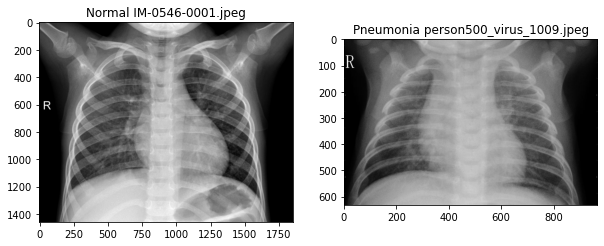

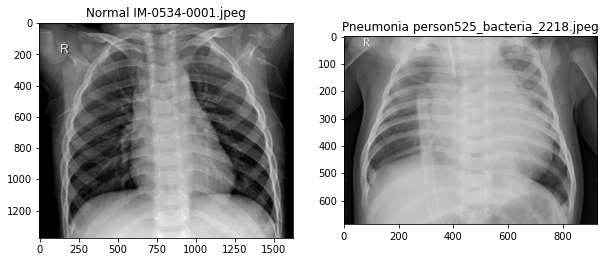

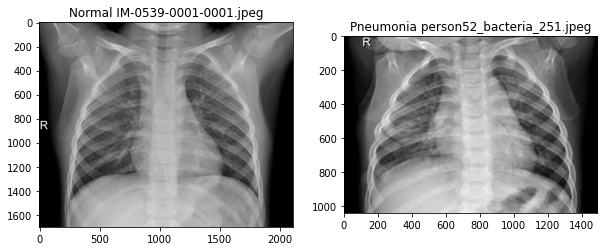

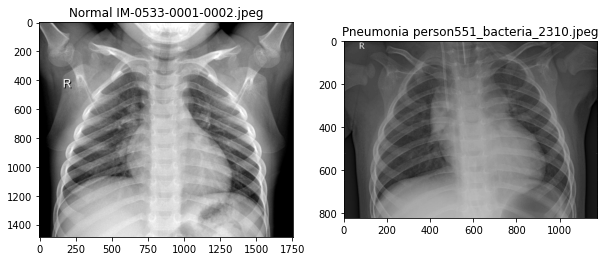

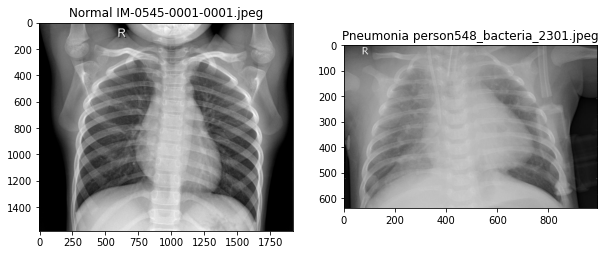

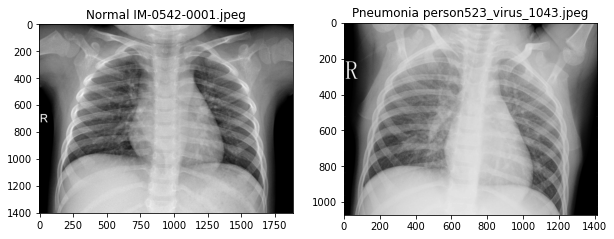

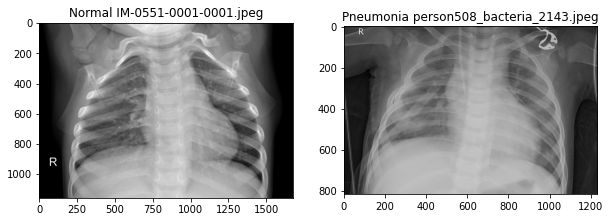

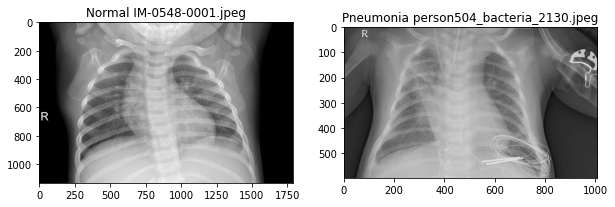

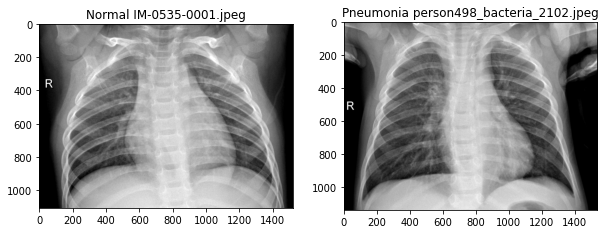

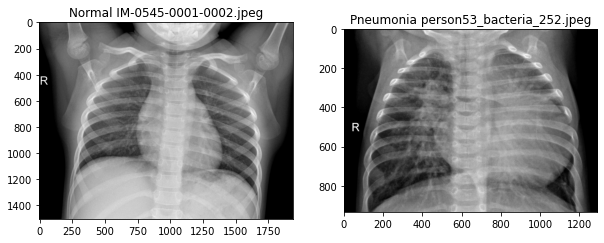

In [ ]:
for i in range(0,10):
    # Load the images
    norm_img = Image.open(norm_pic_address[i])
    pneumonia_img = Image.open(pneumonia_address[i])

    #Let's plt these images
    ## plot normal picture
    f = plt.figure(figsize= (10,6))
    a1 = f.add_subplot(1,2,1)
    img_plot = plt.imshow(norm_img)
    a1.set_title(f'Normal {norm_pic[i]}')

    ## plot pneumonia picture
    a2 = f.add_subplot(1, 2, 2)
    img_plot = plt.imshow(pneumonia_img)
    a2.set_title(f'Pneumonia {pneumonia_pic[i]}')

2. Data Visualization and augmentation (1 mark)
  2. Apply rotation and height shift augmentation (rotation_range, height_shift_range)to the dataset separately. Print the augmented image and the original image for each class and each augmentation.

In [ ]:
# Specify the Column Names while initializing the Table 
mytable = PrettyTable(["Method", "Setting"], 
                     title = "Settings for the image augmentation.") 
  
# Add rows 
mytable.add_row(["Rescale", "1/255"])
mytable.add_row(["Rotation Range", "30 degrees"])  
mytable.add_row(["Shear Range", "0.2"]) 
mytable.add_row(["Zoom Range", "0.2"]) 
mytable.add_row(["Samplewise std normalization", "True"]) 
mytable.add_row(["Height Shift", "0.2"])
mytable.add_row(["Width Shift", "0.2"]) 
mytable.add_row(["Horizontal Flip", "True"]) 

print(mytable)

+-------------------------------------------+
|    Settings for the image augmentation.   |
+------------------------------+------------+
|            Method            |  Setting   |
+------------------------------+------------+
|           Rescale            |   1/255    |
|        Rotation Range        | 30 degrees |
|         Shear Range          |    0.2     |
|          Zoom Range          |    0.2     |
| Samplewise std normalization |    True    |
|         Height Shift         |    0.2     |
|         Width Shift          |    0.2     |
|       Horizontal Flip        |    True    |
+------------------------------+------------+


#  Create a data augmentor

# data_augmentor = ImageDataGenerator(samplewise_center=True, # set each sample mean to 0
#                                    rescale=1./255, # rescale
#                                    rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
#                                    shear_range=0.2, # Randomly shear image 
#                                    zoom_range = 0.2, # Randomly zoom image 
#                                    samplewise_std_normalization=True, # divide each input by its std
#                                    validation_split=0.2, 
#                                    height_shift_range = 0.2, # randomly shift images horizontally (fraction of total height)
#                                    width_shift_range = 0.2, # randomly shift images horizontally (fraction of total width)
#                                    horizontal_flip = True) # randomly flip images

In [ ]:
data_augmentor = ImageDataGenerator(samplewise_center=True, 
                                    rescale=1./255, 
                                    shear_range=0.2,
                                    zoom_range = 0.2,
                                    samplewise_std_normalization=True,
                                    validation_split=0.2) 

# Set hyperparameters
target_size = (128,128)   
target_dims = (128, 128, 3) # add channel for RGB
n_batch_size = 32 

2. Data Visualization and augmentation (1 mark)
  3. Bring the train and test data in the required format

In [ ]:
# Create datasets
train_generator = data_augmentor.flow_from_directory(train_data_dir,  target_size=target_size, subset='training',batch_size= n_batch_size,class_mode='binary')
val_generator = data_augmentor.flow_from_directory(train_data_dir, target_size=target_size,subset='validation',class_mode='binary')
test_generator = data_augmentor.flow_from_directory(test_data_dir, target_size=target_size,batch_size= 1,class_mode=None, shuffle=False)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


2. Data Visualization and augmentation (1 mark)
  4. Print the shapes of train and test data

In [ ]:
train_generator.image_shape

(128, 128, 3)

In [ ]:
test_generator.image_shape

(128, 128, 3)

3. Model Building (0.2*5 = 1 mark)

The Architecture
Our architecture for the CNN has been inspired by the article from Stephan and colleagues (2019) and Yadav and Sjadav (2019). Their neural network architectures were specifically designed for pneumonia image classification tasks. The proposed architecture consists of the convolution, max-pooling, and classification layers combined together. We will now dive into each component and why we chose them.

3. Model Building (0.2*5 = 1 mark)
  1. Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.
  2. Add L2 regularization to all the layers.
  3. Add one layer of dropout at the appropriate position and give reasons.
  4. Choose the appropriate activation function for all the layers.

In [ ]:
def initialize_model(name):    
    model = Sequential(name=name)
    model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=target_dims, padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
    
    model.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
        
    model.add(layers.Conv2D(128, (3, 3), activation="relu", padding='same'))
    model.add(layers.MaxPool2D(pool_size=(3, 3)))
    model.add(Dropout(0.1))
    
    model.add(layers.Flatten())    
    model.add(layers.Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

3. Model Building (0.2*5 = 1 mark)
  5. Print the model summary.

In [ ]:
model = initialize_model(name="basemodel")
model.summary()

Model: "basemodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 64)        0 

4. Model Compilation (0.25 mark)
  1. Compile the model with the appropriate loss function.
  2. Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.
  3. Use accuracy as a metric.

In [ ]:
def compile_model(model):
    model.compile(optimizer="adam",loss='binary_crossentropy',metrics="binary_accuracy")
    return model

Regularization

In order to prevent our model to overtrain we implement the following regularization measures.

In [ ]:
model_baseline = initialize_model(name="baseline")
history_baseline = compile_model(model_baseline)
callback = [EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True),
            ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor=0.3, verbose=1),
            ModelCheckpoint("xray_model_v2.h5",save_best_only=True)]

5. Model Training (0.5 + 0.25 = 0.75 mark)
  1. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
  2. Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.
 

In [ ]:
history_baseline = model_baseline.fit(train_generator,
                                      batch_size=n_batch_size,
                                      epochs=1,
                                      validation_data=val_generator,shuffle=True,
                                      callbacks=callback) #,class_weight=class_weights)

131/131 [==============================] - 1430s 11s/step - loss: 0.3407 - binary_accuracy: 0.8531 - val_loss: 0.2502 - val_binary_accuracy: 0.8945 - lr: 0.0010


6. Model Evaluation (0.5 + 0.5 = 1 mark)
  1. Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.
  2. Print the two most incorrectly classified images for each class in the test dataset.

In [ ]:
scores = model_baseline.evaluate(val_generator)
scores

33/33 [==============================] - 27s 819ms/step - loss: 0.2688 - binary_accuracy: 0.8840


[0.26881924271583557, 0.8839884996414185]

Evaluate our model by looking at a graph

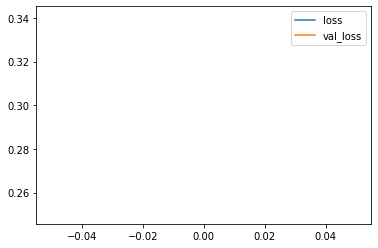

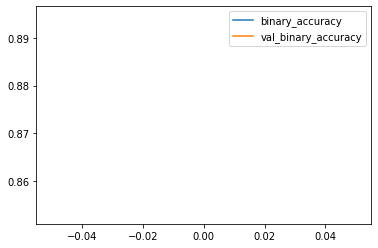

In [ ]:
history_frame = pd.DataFrame(history_baseline.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

Hyperparameter Tuning- Build two more additional models by changing the following hyperparameters ONE at a time. Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model. (1 + 1 = 2 marks)

  1. Optimiser: Use a different optimizer with the appropriate LR value.
  2. Network Depth: Change the number of hidden layers and hidden units for each layer.
Write a comparison between each model and give reasons for the difference in results.